<a href="https://colab.research.google.com/github/vivek6311/Artificial-Intelligence-with-Python/blob/master/Titanic_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
Train= pd.read_csv('/content/train.csv')
Test= pd.read_csv('/content/test.csv')
Train.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
Train.shape

(891, 12)

In [4]:
Test.shape

(418, 11)

In [5]:
y= Train.Survived
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [6]:
Train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
Test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
Train = Train.drop(['PassengerId','Ticket', 'Cabin'], axis=1)
Test = Test.drop(['Ticket', 'Cabin'], axis=1)

In [11]:
tt = [Train, Test]

In [12]:
Train.shape

(891, 9)

In [13]:
Test.shape

(418, 9)

In [14]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [15]:
for dataset in tt:
    dataset['Sex'] = dataset['Sex']. \
        map( {'female': 1, 'male': 0} ).astype(int)

In [16]:
Train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S


In [17]:
for data in tt:
    data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.',\
                                                expand=False)

In [18]:
pd.crosstab(Train['Title'], Train['Sex'])

Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


In [19]:
for data in tt:
    data['Title'] = data['Title'].\
                  replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr',\
                 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    data['Title'] = data['Title'].replace('Mlle', 'Miss') 
    data['Title'] = data['Title'].replace('Ms', 'Miss')
    data['Title'] = data['Title'].replace('Mme', 'Mrs')

In [20]:
Train[['Title', 'Survived']].groupby(['Title']).mean()

,Survived
Title,
Master,0.575000
Miss,0.702703
Mr,0.156673
Mrs,0.793651
Rare,0.347826


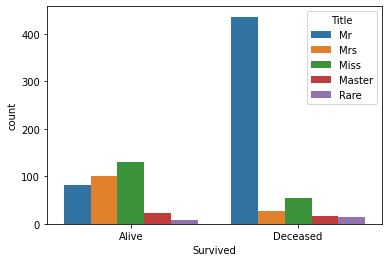

In [21]:
sns.countplot(x='Survived', hue="Title", data=Train, order=[1,0])
plt.xticks(range(2),['Alive','Deceased']);

In [22]:
for data in tt:
    binary_encoded = pd.get_dummies(data.Title)
    newcols = binary_encoded.columns
    data[newcols] = binary_encoded

In [23]:
Train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Master,Miss,Mr,Mrs,Rare
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S,Mr,0,0,1,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C,Mrs,0,0,0,1,0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S,Miss,0,1,0,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S,Mrs,0,0,0,1,0
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S,Mr,0,0,1,0,0


In [24]:
Train= Train.drop(['Name', 'Title'], axis=1)
Test = Test.drop(['Name', 'Title'], axis=1)

In [25]:
Train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Master,Miss,Mr,Mrs,Rare
0,0,3,0,22.0,1,0,7.2500,S,0,0,1,0,0
1,1,1,1,38.0,1,0,71.2833,C,0,0,0,1,0
2,1,3,1,26.0,0,0,7.9250,S,0,1,0,0,0
3,1,1,1,35.0,1,0,53.1000,S,0,0,0,1,0
4,0,3,0,35.0,0,0,8.0500,S,0,0,1,0,0


In [26]:
Test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Master,Miss,Mr,Mrs,Rare
0,892,3,0,34.5,0,0,7.8292,Q,0,0,1,0,0
1,893,3,1,47.0,1,0,7.0000,S,0,0,0,1,0
2,894,2,0,62.0,0,0,9.6875,Q,0,0,1,0,0
3,895,3,0,27.0,0,0,8.6625,S,0,0,1,0,0
4,896,3,1,22.0,1,1,12.2875,S,0,0,0,1,0


In [27]:
Train["Age"].fillna(Train["Age"].mean(), inplace=True)

In [28]:
Test["Age"].fillna(Test["Age"].mean(), inplace=True)

In [29]:
tt = [Train, Test]

In [30]:
for data in tt:
    binary_encoded = pd.get_dummies(data.Embarked)
    newcols = binary_encoded.columns
    data[newcols] = binary_encoded

In [31]:
X= Train.drop(['Survived'], axis='columns')
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Master,Miss,Mr,Mrs,Rare,C,Q,S
0,3,0,22.0,1,0,7.2500,S,0,0,1,0,0,0,0,1
1,1,1,38.0,1,0,71.2833,C,0,0,0,1,0,1,0,0
2,3,1,26.0,0,0,7.9250,S,0,1,0,0,0,0,0,1
3,1,1,35.0,1,0,53.1000,S,0,0,0,1,0,0,0,1
4,3,0,35.0,0,0,8.0500,S,0,0,1,0,0,0,0,1


In [32]:
Test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Master,Miss,Mr,Mrs,Rare,C,Q,S
0,892,3,0,34.5,0,0,7.8292,Q,0,0,1,0,0,0,1,0
1,893,3,1,47.0,1,0,7.0000,S,0,0,0,1,0,0,0,1
2,894,2,0,62.0,0,0,9.6875,Q,0,0,1,0,0,0,1,0
3,895,3,0,27.0,0,0,8.6625,S,0,0,1,0,0,0,0,1
4,896,3,1,22.0,1,1,12.2875,S,0,0,0,1,0,0,0,1


In [33]:
Train= Train.drop(['Embarked'], axis=1)
Test = Test.drop(['Embarked'], axis=1)

In [34]:
Train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Master,Miss,Mr,Mrs,Rare,C,Q,S
0,0,3,0,22.0,1,0,7.2500,0,0,1,0,0,0,0,1
1,1,1,1,38.0,1,0,71.2833,0,0,0,1,0,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,1,0,0,0,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,0,1,0,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,1,0,0,0,0,1


In [35]:
X= Train.drop(['Survived'], axis='columns')
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Master,Miss,Mr,Mrs,Rare,C,Q,S
0,3,0,22.0,1,0,7.2500,0,0,1,0,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,1,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,1,0,0,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1,0,0,0,1
4,3,0,35.0,0,0,8.0500,0,0,1,0,0,0,0,1


In [36]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [37]:
Test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Master,Miss,Mr,Mrs,Rare,C,Q,S
0,892,3,0,34.5,0,0,7.8292,0,0,1,0,0,0,1,0
1,893,3,1,47.0,1,0,7.0000,0,0,0,1,0,0,0,1
2,894,2,0,62.0,0,0,9.6875,0,0,1,0,0,0,1,0
3,895,3,0,27.0,0,0,8.6625,0,0,1,0,0,0,0,1
4,896,3,1,22.0,1,1,12.2875,0,0,0,1,0,0,0,1


In [38]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [39]:
# guess_ages = np.zeros((2,3),dtype=int) 
# guess_ages

In [40]:
#sns.displot(Train, kde=True)


In [41]:
#sns.displot( Train , var = 'Age' , target = 'Survived' ,\
  #                row = 'Sex' )

In [42]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    int64  
 2   Age     891 non-null    float64
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
 5   Fare    891 non-null    float64
 6   Master  891 non-null    uint8  
 7   Miss    891 non-null    uint8  
 8   Mr      891 non-null    uint8  
 9   Mrs     891 non-null    uint8  
 10  Rare    891 non-null    uint8  
 11  C       891 non-null    uint8  
 12  Q       891 non-null    uint8  
 13  S       891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(8)
memory usage: 48.9 KB


In [43]:
y.shape

(891,)

In [44]:
Test= Test.drop(['PassengerId'], axis='columns')


In [45]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Sex     418 non-null    int64  
 2   Age     418 non-null    float64
 3   SibSp   418 non-null    int64  
 4   Parch   418 non-null    int64  
 5   Fare    417 non-null    float64
 6   Master  418 non-null    uint8  
 7   Miss    418 non-null    uint8  
 8   Mr      418 non-null    uint8  
 9   Mrs     418 non-null    uint8  
 10  Rare    418 non-null    uint8  
 11  C       418 non-null    uint8  
 12  Q       418 non-null    uint8  
 13  S       418 non-null    uint8  
dtypes: float64(2), int64(4), uint8(8)
memory usage: 23.0 KB


In [46]:
Test=Test.fillna(7)

In [47]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Sex     418 non-null    int64  
 2   Age     418 non-null    float64
 3   SibSp   418 non-null    int64  
 4   Parch   418 non-null    int64  
 5   Fare    418 non-null    float64
 6   Master  418 non-null    uint8  
 7   Miss    418 non-null    uint8  
 8   Mr      418 non-null    uint8  
 9   Mrs     418 non-null    uint8  
 10  Rare    418 non-null    uint8  
 11  C       418 non-null    uint8  
 12  Q       418 non-null    uint8  
 13  S       418 non-null    uint8  
dtypes: float64(2), int64(4), uint8(8)
memory usage: 23.0 KB


In [54]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)                               
logreg.fit(X, y)                                 
Y_pred = logreg.predict(Test)  

In [55]:
print(Y_pred)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 1]


In [56]:
Predicted = pd.DataFrame(Y_pred)
Predicted.to_csv("Output_Titanic_Log.csv",index_label = 'PassengerId', header = ['Survived'])

## Applying the MAchine Leanrirng Models

In [62]:
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# # Load the data
# data = pd.read_csv("titanic.csv")

# # Define the features and target variable
# X = data[["Pclass", "Age", "Sex", "Fare"]]
# y = data["Survived"]

# # Preprocess the data
# X["Age"].fillna(X["Age"].mean(), inplace=True)
# X["Sex"] = (X["Sex"] == "male").astype(int)

# # Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create the models
log_reg = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)

# Create the voting classifier
vc = VotingClassifier(estimators=[("lr", log_reg), ("dt", dt), ("svm", svm)], voting="hard", max_iter=10000)

# Fit the voting classifier to the training data
vc.fit(X, y)

# Make predictions on the test set
y_pred = vc.predict(Test)

# Evaluate the voting classifier
#print("Accuracy: {:.2f}%".format(acc * 100))


TypeError: ignored

In [64]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# # Load the data
# data = pd.read_csv("titanic.csv")

# # Define the features and target variable
# X = data[["Pclass", "Age", "Sex", "Fare"]]
# y = data["Survived"]

# # Preprocess the data
# X["Age"].fillna(X["Age"].mean(), inplace=True)
# X["Sex"] = (X["Sex"] == "male").astype(int)

# # Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
best_params={'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
# Create and fit the model
model = RandomForestClassifier(**best_params, random_state=0)
model.fit(X, y)
#best_rf = RandomForestClassifier(**best_params, random_state=0)

# Make predictions on the test set
y_pred = model.predict(Test)

# Evaluate the model
#acc = accuracy_score(Test, y_pred)
#print("Accuracy: {:.2f}%".format(acc * 100))


In [65]:
print(y_pred)

[0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 0 1 0 1 0 0 1 0 0 1]


In [66]:
Predicted = pd.DataFrame(y_pred)
Predicted.to_csv("Output_Titanic_Hyper.csv",index_label = 'PassengerId', header = ['Survived'])

In [51]:
print(y_pred)

[0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 0
 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 1 0 0 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1
 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 0 1 0 1 0 0 1 0 0 1]


In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score

# Define the hyperparameter grid
param_grid = {
    "n_estimators": [10, 50, 100, 200],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["auto", "sqrt", "log2"]
}

# Create a Random Forest model
rf = RandomForestClassifier(random_state=0)

# Create a Grid Search object
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring=make_scorer(accuracy_score), n_jobs=-1)

# Fit the Grid Search object to the data
grid_search.fit(X, y)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best parameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best score: 0.8372544096415794


In [52]:
Predicted = pd.DataFrame(y_pred)
Predicted.to_csv("Output_Titanic_RFC.csv",index_label = 'PassengerId', header = ['Survived'])

In [53]:
logreg = LogisticRegression()                                # instantiate
logreg.fit(X, y)                                 # fit
Y_pred = logreg.predict(Test)                               # predict

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
